# Training DenseNet on Cifar10 using SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/MyDrive/DL_project
/content/drive/MyDrive/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


In [ ]:
trainer = Net_Trainer(device, 'dn', 'dn_sgd_c10', train_dataset_10, test_dataset_10, lr=0.1, optm='sgd', loss='ce', batch_size=64, epochs=100, 
                      weight_decay=1e-4, step=[150,225], lr_decay=0.1, mom=0.9, smooth=False)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla T4
Epoch:0   Loss:1.304   Val loss:1.032   Accuracy:63.465   Best val loss:1.032   Time taken:302.993
Epoch:1   Loss:0.754   Val loss:0.777   Accuracy:72.432   Best val loss:0.777   Time taken:297.436
Epoch:2   Loss:0.567   Val loss:0.58   Accuracy:79.538   Best val loss:0.58   Time taken:293.866
Epoch:3   Loss:0.465   Val loss:0.552   Accuracy:81.3   Best val loss:0.552   Time taken:280.046
Epoch:4   Loss:0.394   Val loss:0.572   Accuracy:81.021   Best val loss:0.552   Time taken:289.561
Epoch:5   Loss:0.342   Val loss:0.486   Accuracy:83.678   Best val loss:0.486   Time taken:289.246
Epoch:6   Loss:0.304   Val loss:0.57   Accuracy:81.449   Best val loss:0.486   Time taken:286.422
Epoch:7   Loss:0.279   Val loss:0.512   Accuracy:83.021   Best val loss:0.486   Time taken:287.777
Epoch:8   Loss:0.253   Val loss:0.467   Accuracy:84.375   Best val loss:0.467   Time taken:289.442
Epoch:9   Loss:0.237   Val loss:0.468   Accuracy:84.425   Best val loss:0.467   Time taken:285.953
E

In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'dn', 'dn_sgd_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_dn_sgd_c10', lr=0.1, optm='sgd', loss='ce', batch_size=64, epochs=100, 
                      weight_decay=1e-4, step=[150,225], lr_decay=0.1, mom=0.9, smooth=False)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla K80
Epoch:29   Loss:0.129   Val loss:0.459   Accuracy:86.545   Best val loss:0.405   Time taken:475.804
Epoch:30   Loss:0.133   Val loss:0.482   Accuracy:86.166   Best val loss:0.405   Time taken:475.114
Epoch:31   Loss:0.131   Val loss:0.513   Accuracy:85.51   Best val loss:0.405   Time taken:475.641
Epoch:32   Loss:0.13   Val loss:0.599   Accuracy:83.539   Best val loss:0.405   Time taken:476.001
Epoch:33   Loss:0.126   Val loss:0.508   Accuracy:85.111   Best val loss:0.405   Time taken:475.844
Epoch:34   Loss:0.124   Val loss:0.69   Accuracy:82.315   Best val loss:0.405   Time taken:476.846
Epoch:35   Loss:0.119   Val loss:0.514   Accuracy:85.111   Best val loss:0.405   Time taken:478.718
Epoch:36   Loss:0.129   Val loss:0.46   Accuracy:87.022   Best val loss:0.405   Time taken:479.232
Epoch:37   Loss:0.118   Val loss:0.521   Accuracy:85.997   Best val loss:0.405   Time taken:478.346
Epoch:38   Loss:0.118   Val loss:0.626   Accuracy:83.658   Best val loss:0.405   Time tak

cuda Tesla T4
Epoch:95   Loss:0.107   Val loss:0.427   Accuracy:87.57   Best val loss:0.376   Time taken:242.561
Epoch:96   Loss:0.096   Val loss:0.577   Accuracy:84.614   Best val loss:0.376   Time taken:249.205
Epoch:97   Loss:0.099   Val loss:0.469   Accuracy:86.186   Best val loss:0.376   Time taken:246.537
Epoch:98   Loss:0.099   Val loss:0.458   Accuracy:86.813   Best val loss:0.376   Time taken:247.042
Epoch:99   Loss:0.101   Val loss:0.517   Accuracy:85.47   Best val loss:0.376   Time taken:248.094


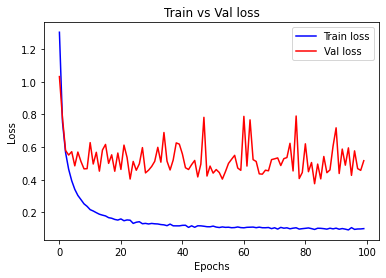

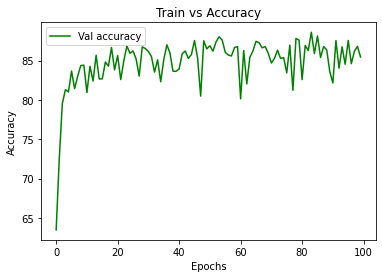

Best epoch: 83


In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'dn', 'dn_sgd_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_dn_sgd_c10', lr=0.1, optm='sgd', loss='ce', batch_size=64, epochs=100, 
                      weight_decay=1e-4, step=[150,225], lr_decay=0.1, mom=0.9, smooth=False)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)